# Log Analysis

In [1]:
from visualize import get_dataframe_log, plot_log

log_file = '192.168.10.1_42477\communication.log'
df_log = get_dataframe_log(log_file)

In [2]:
df_log

,time,action,pdu_type,frame_no,ack_no,data_size,status
0,2024-04-20 15:19:56,Recv,MESSAGE,1,1,5,OK
1,2024-04-20 15:19:56,Send,ACK,1,2,0,New
2,2024-04-20 15:19:56,Send,ACK,2,2,0,New
3,2024-04-20 15:19:56,Send,ACK,2,2,0,New
4,2024-04-20 15:19:56,Send,ACK,2,2,0,New
...,...,...,...,...,...,...,...
85343,2024-04-20 15:37:42,Send,MESSAGE,26,26,5,New
85344,2024-04-20 15:37:43,Send,MESSAGE,26,26,5,TimeOut
85345,2024-04-20 15:37:43,Send,MESSAGE,22,22,5,TimeOut
85346,2024-04-20 15:37:43,Recv,ACK,27,27,0,OK


<!-- 统计数据

- 文件划分的 PDU 总数量
- 通信总次数
- 超时次数
- 重传 PDU 的数量
- 总耗时 -->

- Statistics
    - Total number of PDUs
    - Total number of communications
    - Number of timeouts
    - Number of retransmitted PDUs
    - Total time

In [3]:
# Total number of PDUs
send_file_new_packets = df_log[
    (df_log["action"] == "Send") & (df_log["pdu_type"] == "FILE") & (df_log["status"] == "New")
]
print(f"Total number of PDUs: {len(send_file_new_packets)}")

Total number of PDUs: 1636


In [4]:
# Total number of communications
success_packets = df_log[
    (df_log["status"] != "DataErr") & (df_log["status"] != "Retransmit") & (df_log["status"] != "Timeout")
]
print(f"Total number of communications: {len(success_packets) / 2 :.0f}")

Total number of communications: 37394


In [5]:
# Number of timeouts
timeouts = df_log[
    (df_log["status"] == "TimeOut")
]
print(f"Number of timeouts: {len(timeouts)}")

Number of timeouts: 15748


In [6]:
# Number of retransmissions
retransmissions = df_log[
    (df_log["status"] == "Retransmit")
]
print(f"Number of retransmissions: {len(retransmissions)}")

Number of retransmissions: 4394


In [7]:
# Number of data errors
data_errors = df_log[
    (df_log["status"] == "DataErr")
]
print(f"Number of data errors: {len(data_errors)}")

Number of data errors: 6165


In [8]:
# Total time
total_time = df_log["time"].max() - df_log["time"].min()
print(f"Total time: {total_time}")

Total time: 0 days 00:17:47


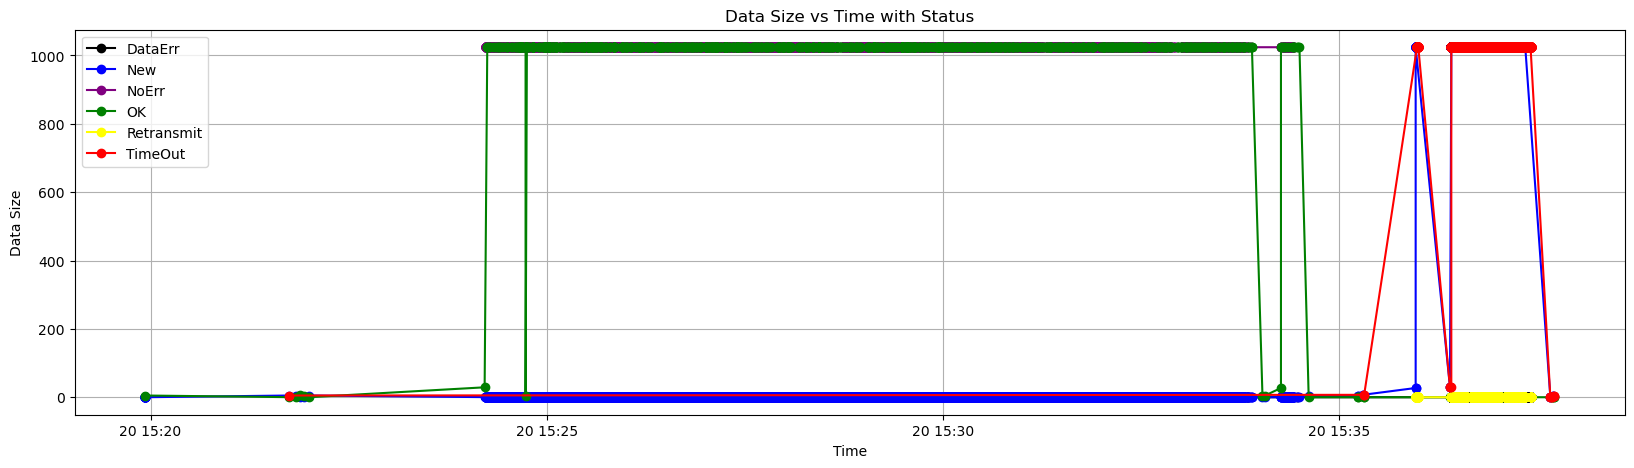

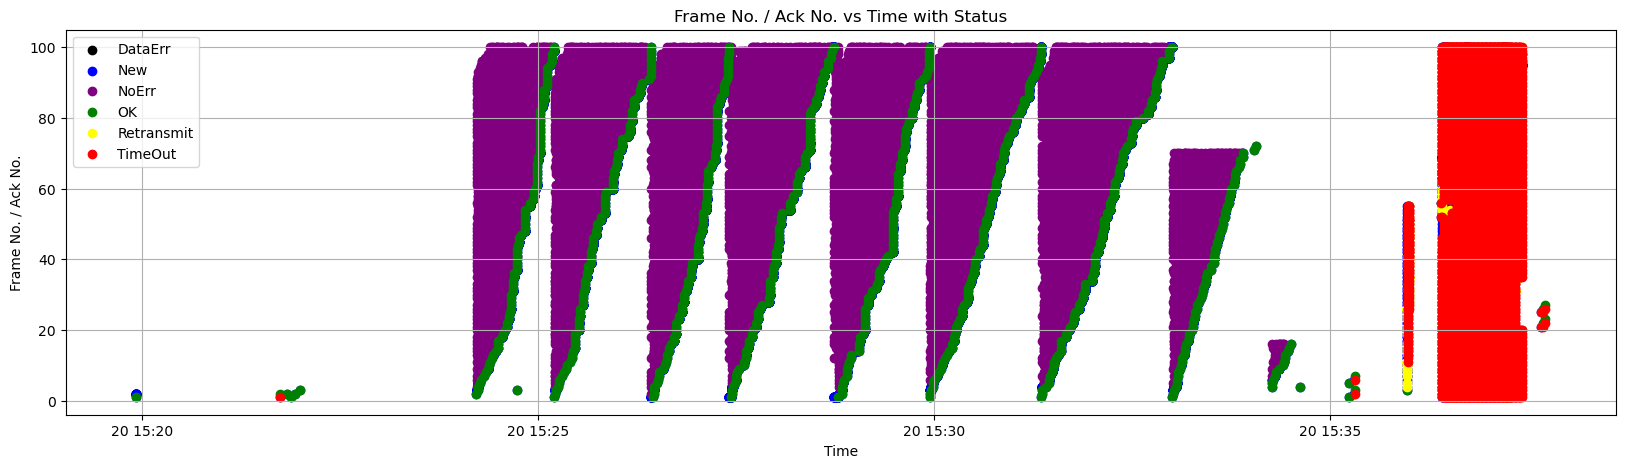

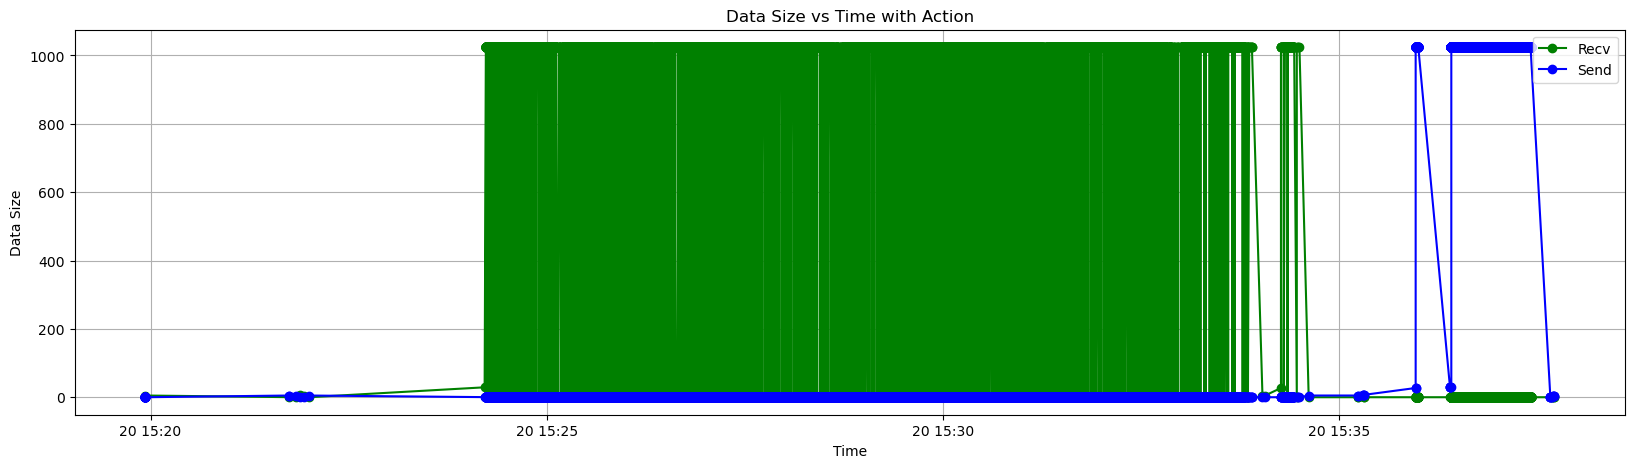

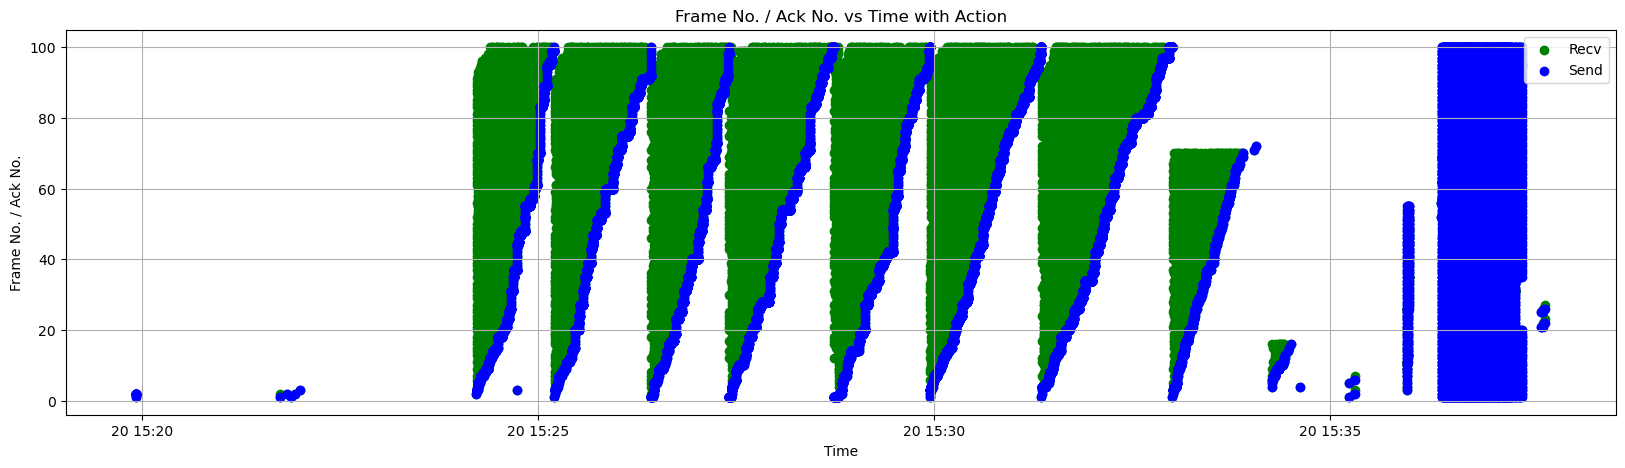

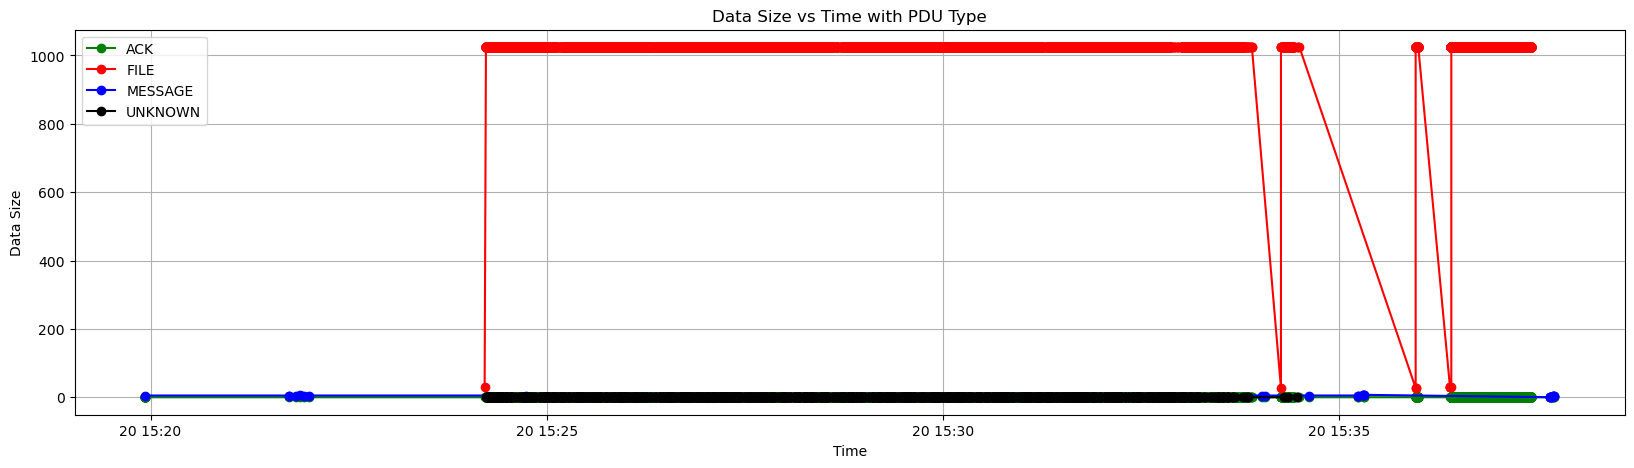

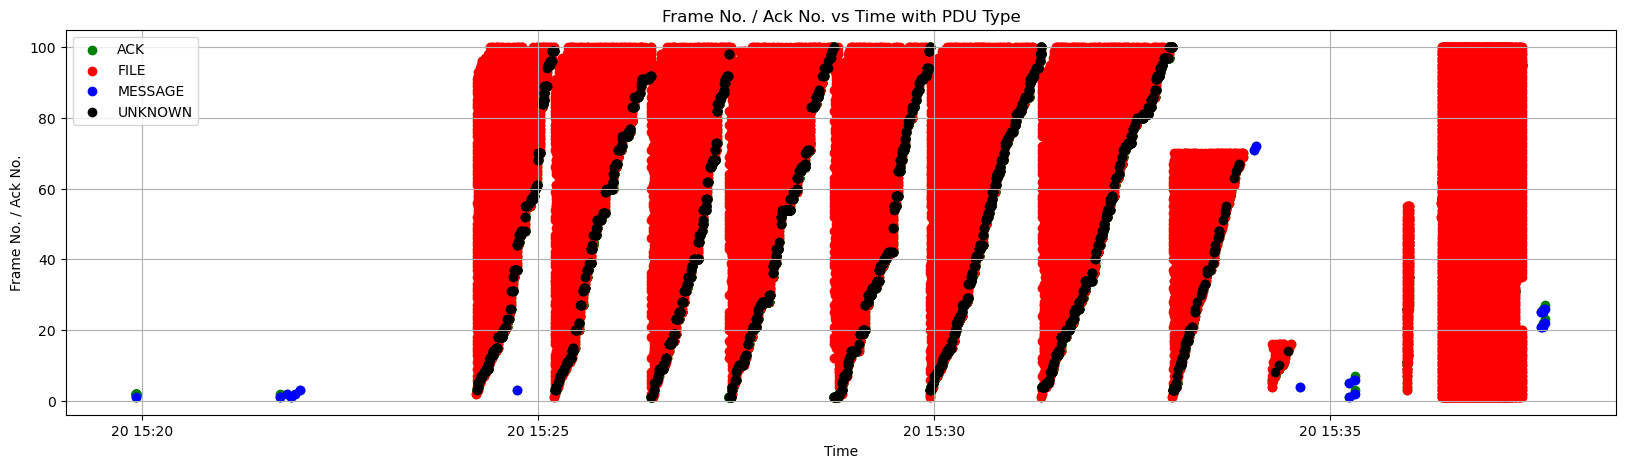

In [9]:
width, height = 20, 5
attributes = ['status', 'action', 'pdu_type']
show_values = ['data_size', 'frame_no']
for attribute in attributes:
    for show_value in show_values:
        plot_log(df_log, attribute, show_value, is_save=False, width=width, height=height)